# introductory text (explain: dataset, task)

I am working with a dataset of tweets found on twitter that classify as different types of cyberbullying, including; Ethnicity, Age, Religion, Gender, Other_cyberbullying, and not_cyberbullying. The goal is to input a string and have the model classify what type of cyberbulling that string may include. JUST A DISCLAMER: There are words that are offensive in this experiment please proceed at your own caution!

# import requisite modules

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# helper functions (if necessary)

In [3]:
# python code

# pre-process, analyze dataset

In [4]:
data = pd.read_csv('cyberbullying_tweets.csv')

#The data set is balanced
data['cyberbullying_type'].value_counts()

data.info()

#clean the data of duplicates
data = data.drop_duplicates()

types = np.unique(data['cyberbullying_type'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


# visualize dataset

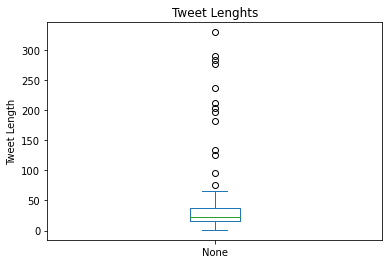

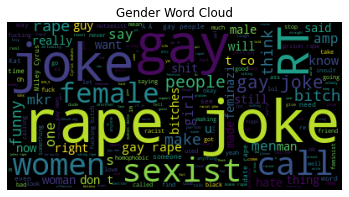

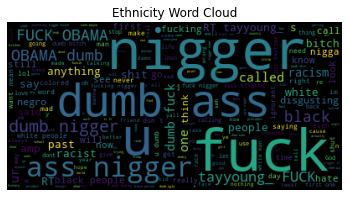

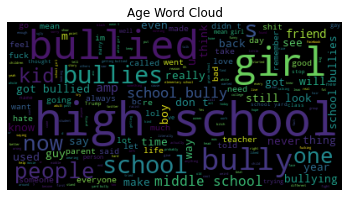

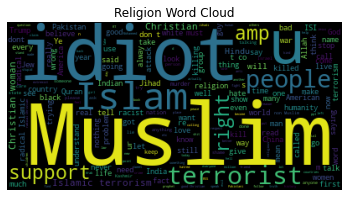

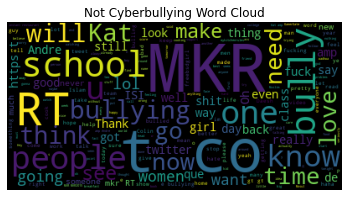

In [26]:
# Calculating tweet length
tweet_len = pd.Series([len(tweet.split())for tweet in data['tweet_text']])
plt.figure()
plt.title("Tweet Lenghts")
tweet_len.plot(kind="box")
plt.ylabel("Tweet Length")
plt.show()

# Gender Word Cloud
text = " ".join(review for review in data[data.cyberbullying_type=='gender'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.title('Gender Word Cloud')
plt.axis("off")
plt.show()

# Ethnicity Word Cloud
text = " ".join(review for review in data[data.cyberbullying_type=='ethnicity'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.title('Ethnicity Word Cloud')
plt.axis("off")
plt.show()

# Age Word Cloud
text = " ".join(review for review in data[data.cyberbullying_type=='age'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.title('Age Word Cloud')
plt.axis("off")
plt.show()

#Religion Word Cloud
text = " ".join(review for review in data[data.cyberbullying_type=='religion'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.title('Religion Word Cloud')
plt.axis("off")
plt.show()


#Not Word Cloud
text = " ".join(review for review in data[data.cyberbullying_type=='not_cyberbullying'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.title('Not Cyberbullying Word Cloud')
plt.axis("off")
plt.show()

# experiment with algorithms, feature sets, parameters, etc.,

In [28]:
'''
all models not happy with epochs

If we use 5000 max features without PCA Random Tree goes to 77 77 78% 
 
When PCA applied on 100 max features RT went down to almost 50% which is bad SVM went to 72, 72, 73 so still not better.

100 features for random and SVM

Naive Bayes
Accuracy: 0.705937893411666
Precision: 0.7077550268980147
Recal: 0.716049990799353

Random Tree
Accuracy: 0.6763533361309274
Precision: 0.6764431628398846
Recal: 0.6801272149132053

SVM
Accuracy: 0.7347880822492656
Precision: 0.7347444621512592
Recal: 0.749660310767112
'''

'''
#PCA Code that was used but not in final models
# Performing Dimensionality Reduction using Principal Component Analysis
NUM_COMPONENTS = 100  # Total number of features
pca = PCA(NUM_COMPONENTS)
reduced = pca.fit(scaled_X_train)

final_pca = PCA(0.9)   
reduced = final_pca.fit_transform(scaled_X_train)

reduced_test = final_pca.transform(scaled_X_test)
'''
#Drop other cyberbulling
data = data[data["cyberbullying_type"]!="other_cyberbullying"]

x = data['tweet_text']
y = data['cyberbullying_type']

#split the data to be trained and tested
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#The tf–idf value increases proportionally to the number of times a word appears in the document
NB_model = Pipeline([("tfidf", TfidfVectorizer()), ("clf", MultinomialNB())])

NB_model.fit(x_train, y_train)

results = cross_val_score(NB_model, x_test, y_test, cv = 5)
predict = cross_val_predict(NB_model, x_test, y_test, cv = 5)

NBa = accuracy_score(predict, y_test)
NBp = precision_score(predict, y_test, average='macro')
NBr = recall_score(predict, y_test, average='macro')

print("Naive Bayes")
print("Accuracy: " + str(accuracy_score(predict, y_test)))
print("Precision: " + str(precision_score(predict, y_test, average='macro')))
print("Recal: " + str(recall_score(predict, y_test, average='macro')))
print("")


#Other models require tfidf scaled data in form of numpy array.
#Start with 100 feature size
#Try with 5000 feature size

tfidf = TfidfVectorizer(max_features = 100)

X_train_tfidf = tfidf.fit_transform(x_train)

X_test_tfidf = tfidf.transform(x_test)  

#Normalize the data
scaler = StandardScaler()

tfidf_array_train = X_train_tfidf.toarray()   # Converting the sparse matrix to a numpy array (dense matrix)

tfidf_array_test = X_test_tfidf.toarray()     # Converting the sparse matrix to a numpy array (dense matrix)

scaled_X_train = scaler.fit_transform(tfidf_array_train)  # Fitting on only training data to avoid data leakage from test data

scaled_X_test = scaler.transform(tfidf_array_test) # and then tranforming both training and testing data


#SVM
from sklearn.svm import SVC
SVM_model = SVC()

SVM_model.fit(scaled_X_train, y_train) 

results = cross_val_score(SVM_model, scaled_X_test, y_test, cv = 5)
predict = cross_val_predict(SVM_model, scaled_X_test, y_test, cv = 5)

SVa = accuracy_score(predict, y_test)
SVp = precision_score(predict, y_test, average='macro')
SVr = recall_score(predict, y_test, average='macro')

print("SVM 100 features")
print("Accuracy: " + str(accuracy_score(predict, y_test)))
print("Precision: " + str(precision_score(predict, y_test, average='macro')))
print("Recal: " + str(recall_score(predict, y_test, average='macro')))
print("")


#Decision Tree max feature size = 5000

tfidf = TfidfVectorizer(max_features = 5000)

X_train_tfidf = tfidf.fit_transform(x_train)

X_test_tfidf = tfidf.transform(x_test)  

#Normalize the data
scaler = StandardScaler()

tfidf_array_train = X_train_tfidf.toarray()   # Converting the sparse matrix to a numpy array (dense matrix)

tfidf_array_test = X_test_tfidf.toarray()     # Converting the sparse matrix to a numpy array (dense matrix)

scaled_X_train_5000 = scaler.fit_transform(tfidf_array_train)  # Fitting on only training data to avoid data leakage from test data

scaled_X_test_5000 = scaler.transform(tfidf_array_test) # and then tranforming both training and testing data


#Decision Tree
from sklearn.tree import DecisionTreeClassifier

RT_model = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random')

RT_model.fit(scaled_X_train_5000, y_train)

results = cross_val_score(RT_model, scaled_X_test_5000, y_test, cv = 5)
predict = cross_val_predict(RT_model, scaled_X_test_5000, y_test, cv = 5)

RTa = accuracy_score(predict, y_test)
RTp = precision_score(predict, y_test, average='macro')
RTr = recall_score(predict, y_test, average='macro')

print("Random Tree 5000 features")
print("Accuracy: " + str(accuracy_score(predict, y_test)))
print("Precision: " + str(precision_score(predict, y_test, average='macro')))
print("Recal: " + str(recall_score(predict, y_test, average='macro')))
print("")


Naive Bayes
Accuracy: 0.8102171457261202
Precision: 0.8126441875678827
Recal: 0.8263186819445811

SVM 100 features
Accuracy: 0.8488766160411698
Precision: 0.8485316572688607
Recal: 0.8623490113225445

Random Tree 5000 features
Accuracy: 0.8960712940881135
Precision: 0.8962372528711086
Recal: 0.8987709433472165



# visualize experimental results

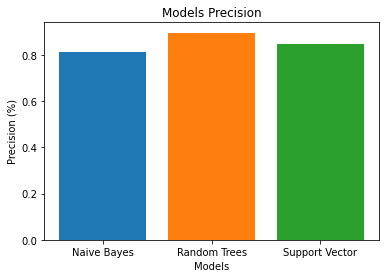

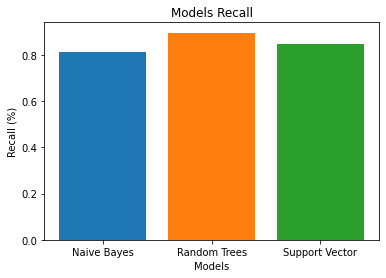

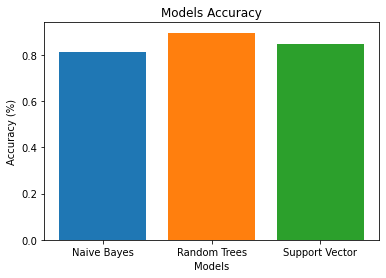

Naive Bayes
Decision Tree
Support Vector Machine


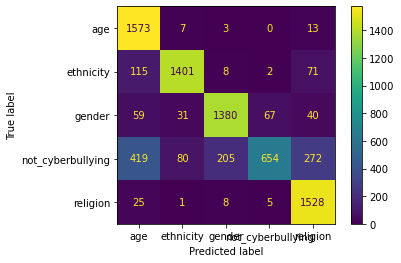

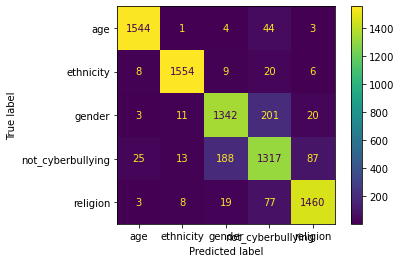

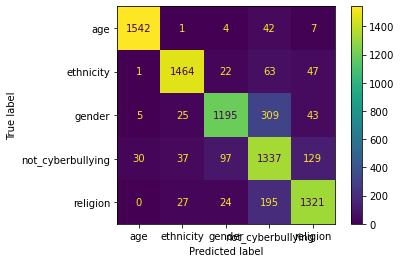

In [30]:
from sklearn.metrics import plot_confusion_matrix

plt.figure()
plt.title('Models Precision')
plt.ylabel('Precision (%)')
plt.xlabel('Models')
plt.bar('Naive Bayes', NBp)
plt.bar('Random Trees', RTp)
plt.bar('Support Vector', SVp)
plt.show()

plt.figure()
plt.title('Models Recall')
plt.ylabel('Recall (%)')
plt.xlabel('Models')
plt.bar('Naive Bayes', NBp)
plt.bar('Random Trees', RTp)
plt.bar('Support Vector', SVp)
plt.show()

plt.figure()
plt.title('Models Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Models')
plt.bar('Naive Bayes', NBp)
plt.bar('Random Trees', RTp)
plt.bar('Support Vector', SVp)
plt.show()

print('Naive Bayes')
plot_confusion_matrix(NB_model, x_test, y_test)

print('Decision Tree')
plot_confusion_matrix(RT_model, scaled_X_test_5000, y_test)

print('Support Vector Machine')
plot_confusion_matrix(SVM_model, scaled_X_test, y_test)

# analyze / explain experimental results

The first model I tried using was Naive Bayes I quickly found out that in order to quantify the strings into usable data I needed to use a TfidfVectorizer, the Tf-idf value increases proportionally to the number of times a word appears in the document. Using just the cleaned Tf-idf raw data I was able to train a multinomial naive bayes to achieve an accuracy of around 70%. The other models I tried using was a Desecion Tree, specifically a random tree and a support vector machine. When I tried plugging in raw data values like the ones used in the Naive Bayes both did not like the format of the data so I needed to again use a Tf-idf vectorizer but this time i was able to set a feature size. I origionally used a max feature size of 100 to keep things quick. It was also neccesary to normalize the data after the Tf-idf  and store it in a numpy array. With a max feature size of 100 the random tree was only able to provide an accuracy, precision, recall of around 67% and the support vector machine was able to achieve an accuracy, precision, recall of around 73%. Becuase not one model seemed to excell over the others i tried a number of methods to tinker with the models. The first thing to do was change my max_feature size to something higher say 3-5000. When I used a feature size of 5000 with the random tree model I was able to increase the accuracy to 77-78%. When I tried a feature size this large with the support vector machine the results were inconclusive to do the extremely long run times associated with it. I tried applying a PCA that would capture the features that associate 90% of the variance in the data. When I did this my Decision tree model dropped to a stagering 50% accuracy in classification. When I applied the PCA to the SVM the accuracy, precision, recall didnt change from 72-73%. I also tried applying epochs to my fit functions but they kept returning errors. After seeing that my decision tree classifier had the best accuracy, precision, recall I tried changing some parameters within this model like changing random to best and changing entropy to gini but these parameter changes only affected accuracy, precision, recall by 1-2%. After viewing my confusion matricies I saw that all models were having a hard time classifying the 'other_cyberbullying' so I decided it would be a good Idea to drop these entries from the data and only classify based on; Age, Gender, Ethnicity, Age, and not_cyberbullying. This was a good idea because it managed to increase my accuracy, precision, recall in all models to be above 80% my decesion tree was still the best and I was able to achieve a 89% accuracy, precision and recall. 

# conclusion 

To state again the goal of this project was to use a dataset of tweets found on twitter that classify as different types of cyberbullying or not cyberbullying. I wanted my model to be able to differentiate the different types of cyberbullying. To conclude my experiment the Random Decision tree classifier was the best model I could come up with to classify various cyberbulling tweets found online. Changing my max feature size in this model to 5000 and removing the 'other_cyberbullying' tweets from my data set were the largest determining factors in achieving higher accuracy, precision and recall. I believe dropping the 'other cyberbullying' tweets contributed so heavily to the increase from 70% to 80% was because the models were having a hard time differentiating between other and non-cyberbullying. 